# OPTICS (Ordering Points to Identify the Clustering Structure) Algorithm

## Introduction
**Clustering** adalah salah satu metode pengelompokan data yang bersifat unsupervised learning. Tujuan utama dari metode clustering ini adalah untuk mengelompokkan data menjadi kelompok-kelompok tertentu dimana anggota dalam satu kelompok memiliki karakteristik/kemiripan yang sama dan berbeda dengan cluster yang lainnya.
Clustering memiliki berbagai macam metode, beberapa yang banyak digunakan adalah Partitioning Clustering (K-Means dan K-Medoids), Hierarchical Clustering, dan Density Clustering.

**Density Clustering** adalah metode clustering yang memanfaatkan tingkat kerapatan object untuk dilakukan pengelompokan. Salah satu algoritma density clustering yang paling terkenal adalah DBSCAN (Density-based Spatial Clustering of Application with Noise). Dimana algoritma ini memiliki dua parameter utama yang akan dijadikan input ketika melakukan proses clustering, yaitu parameter epsilon (eps) dan minimum points (minPts).
Konsep utama dari algoritma DBSCAN adalah mengelompokkan data dengan tetangganya dalam satu/beberapa cluster, dimana dalam satu cluster harus terdapat jumlah anggota yang memenuhi nilai dari minimum points (minPts). Selain itu, jarak antara titik utama (core point) dengan anggota dalam satu cluster tidak boleh lebih dari nilai epsilonnya. Titik utama (core point) akan dipilih secara acak pada iterasi pertama.
Dikarenakan jangkauan nilai epsilon yang konstan pada setiap clusternya, algoritma DBSCAN ini memiliki kekurangan, yaitu kesulitan untuk menjangkau titik dengan kepadatan yang berbeda-beda (*varying density*). Padahal sangat memungkinkan titik yang tidak dapat terjangkau tersebut termasuk dalam kategori *meaningful cluster*.

Hal tersebut inilah yang menginisiasi terciptanya algortima OPTICS. Algoritma OPTICS dapat mengatasi kekurangan algoritma DBSCAN untuk melakukan clustering dengan tingkat kepadatan yang berbeda (*varying density*).

## OPTICS Algorithm
Secara umum, cara kerja algoritma OPTICS sama dengan cara kerja algoritma DBSCAN. Parameter yang dimilikipun sama yaitu parameter epsilon (eps) dan parameter minimum points (minPts). Namun, pada algoritma OPTICS ini terdapat dua terminologi baru yang sebelumnya tidak ada pada algoritma DBSCAN, yaitu *core distance* dan *reachability distance*.
Berikut d adalah pengertian dari kedua terminologi tersebut :

**Core distance** : Jarak/radius minimum dari core point p (yang di identifikasikan sebagai core point) dengan anggota *neighborhood* dalam satu cluster.

**Reachability distance** : Jarak minimum titik q dari core point p di luar dari bagian core objek (memenuhi minPts).

### Bagaimana *minPts* dan *epsilon* mengambil peran dalam pembentukan cluster?
Sama halnya dengan DBSCAN, pada OPTICS kita dapat memanfaatkan parameter *minPts* dan *epsilon* sebagai unsur pembentukan cluster. Akan tetapi jika pada DBSCAN *epsilon* dianggap sebagai jarak konstan untuk membentuk sebuah cluster, pada OPTICS nantinya kita akan mempertimbangkan jarak antara titik-titik yang berdekatan untuk membuat reachability distance yang kemudian digunakan untuk memisahkan cluster dengan kepadatan yang bervariasi dari noise.

<img src="assets/OPTICS_SEarch_Distance.PNG" width='400'>

Parameter *minPts* pada OPTICS digunakan untuk menentukan jumlah minimum fitur/titik yang diperlukan untuk mempertimbangkan pengelompokan titik-titik pada sebuah cluster. Misalnya jika kita memiliki sejumlah cluster berbeda dengan ukuran mulai dari 10 titik hingga 50 titik dan kita menetapkan nilai *minPts* sebanyak 20, maka untuk semua cluster yang memiliki anggota kurang dari 20 titik akan dianggap sebagai noise karena tidak membentuk pengelompokan yang cukup besar untuk dianggap sebagai cluster atau titik-titik tersebut akan digabungkan dengan cluster terdekat untuk memenuhi jumlah minimum titik yang diperlukan.
Pada OPTICS, epsilon diperlakukan sebagai jarak maksimum yang akan dibandingkan dengan jarak inti (core distance). OPTICS menggunakan konsep jarak jangkauan maksimum, yaitu jarak dari titik ke tetangga terdekatnya yang belum pernah dikunjungi oleh pencarian (titik-titik pada boundary 2). OPTICS akan mencari semua jarak tetangga dalam jangkauan epsilon yang ditentukan, kemudian membandingkan masing-masing titik tersebut dengan core distance. Jika ada jarak yang lebih kecil dari jarak inti(semua titik yang masuk pada boundary 1), maka titik tersebut menetapkan core distance sebagai reachability distance-nya (CD=RD). Jika semua jarak lebih besar dari jarak inti(semua titik yang ada di boundary 2), maka jarak terkecil ditetapkan sebagai reachability distancenya. Jarak ini kemudian digunakan untuk membuat reachable plot, yang merupakan plot terurut dari reachability distance yang digunakan untuk mendeteksi cluster.

### Bagaimana reachability distance berperan dalam pembentukan reachable plot?
Untuk semua titik pada dataset akan dihitung reachability distancenya karena jarak ini nantinya akan digunakan dan dipetakan pada reachability plot. Gambar di bawah ini menggambarkan ilustrasi pembentukan cluster dari reachability plot.

<img src="assets/Reachability_Plot.PNG" width=600>

Lembah dalam reachability plot mewakili cluster yang berbeda untuk setiap pola dari titik-titik tertentu. Semakin padat sebuah cluster, semakin rendah reachability distance-nya, dan semakin rendah lembah pada plot (cluster warna pink adalah contoh cluster yang paling padat diantara cluster lainnya). Cluster yang kurang padat memiliki reachability distance yang lebih tinggi dan bentuk lembah yang lebih tinggi pada plot (contohnya pada cluster hijau tua adalah yang paling tidak padat). Selain lembah kita juga melihat puncak pada reachability plot. Puncak mewakili jarak yang diperlukan dari satu cluster ke cluster lain, atau dari cluster ke titik noise kemudian ke cluster lainnya, tergantung pada konfigurasi himpunan titik-titik pada sebuah data(urutan reachability plotnya).

<img src="assets/ilustrasi_lembah_puncak.PNG">

Puncak dapat terjadi di reachability plot ketika epsilon kurang dari core distance terbesar. Aspek penting dalam pengelompokan OPTICS adalah menentukan cara mendeteksi cluster dari reachability plot yang dapat dilakukan dengan menggunakan parameter Sensitivitas Cluster.

### Cluster Sensitivity (OPTICS)

Di dalam algoritma OPTICS terdapat parameter *sensitivity* yang dapat digunakan untuk menentukan sedikit atau banyaknya cluster yang terbentuk. Parameter tersebut adalah *low cluster sensitivity* dan *high cluster sensitivity*.
Konsep dari *high cluster sensitivity* adalah memperlakukan setiap puncak pada urutan *reachability distance* yang terbentuk sebagai pemisah antara tiap cluster. Sehingga hal ini memungkinkan jumlah cluster yang terbentuk semakin banyak. Sedangkan *low cluster sensitivity* bersifat sebaliknya, *low sensitivity* hanya mempertimbangkan puncak yang bentuknya signifikan. Sehingga jumlah cluster yang terbentuk akan lebih sedikit jika dibandingkan dengan *high sensitivity*.

Agar memudahkan dalam memahami *cluster sensitivity* berikut di bawah ini adalah ilustrasinya :

<img src="assets/sensitivity.JPG" width='700'>


### Membandingkan method DBSCAN dengan OPTICS

Sebelumnya, sudah dijelaskan bahwa perbedaan mendasar antara DBSCAN dan OPTICS terletak pada terminologi *reachability distance* dan *core distance* nya. Dimana dengan adanya *reachability distance* yang terurut, OPTICS dapat mengatasi kelemahan DBSCAN saat menjangkau titik yang berpotensi sebagai *meaningful cluster*. Berikut di bawah ini, dijelaskan perbandingan konsep keduanya dalam bentuk ilustrasi gambar.

#### 1. DBSCAN
<img src="assets/dbscan.JPG" width='450'>

Kekurangan dari algoritma DBSCAN adalah menjadikan nilai epsilonnya sebagai parameter *cut off* atau *threshold*, sehingga apabila diperhatikan pada gambar diatas, nilai diatas batas *cut off* akan diidentifikasi sebagai *noise*. Padahal sangat memungkinkan *noise* tersebut sebenarnya adalah *meaningful cluster*.

#### 2. OPTICS
<img src="assets/optics.JPG" width='450'>

Berbeda dengan DBSCAN, dikarenakan OPTICS menerapkan konsep *reachability distance* dan tidak mempertimbangkan nilai *epsilon* maka algoritma ini mampu menjangkau object-object yang berpotensi untuk dikategorikan sebagai cluster. Apabila diperhatikan pada ilustrasi diatas, noise yang dianggap oleh DBSCAN akan dianggap sebagai cluster baru pada algoritma ini. 

### Contoh Implementasi OPTICS pada Python

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [2]:
data = pd.read_csv('data_input/Mall_Customers.csv') 

drop_features = ['CustomerID', 'Gender'] 
data = data.drop(drop_features, axis = 1) 

data.fillna(method ='ffill', inplace = True) 

data.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [3]:
# Melakukan proses scaling untuk standarisasi nilai 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 

# Melakukan normalisasi untuk membuat normal distribusi
X_normalized = normalize(X_scaled) 

# Converting numpy ke dalam data frame
X_normalized = pd.DataFrame(X_normalized) 

# Melakukan rename kolom
X_normalized.columns = data.columns 

X_normalized.head() 


,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


In [4]:
#min sample = minPts
#xi
optics_model = OPTICS(min_samples = 10, xi = 0.05) 

optics_model.fit(X_normalized) 

OPTICS(min_samples=10)

In [5]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
    core_distances = optics_model.core_distances_, 
    ordering = optics_model.ordering_, eps = 0.5) 

# Producing the labels according to the DBSCAN technique with eps = 0.25 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
    core_distances = optics_model.core_distances_, 
    ordering = optics_model.ordering_, eps = 0.25) 

# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X_normalized)) 

# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 

# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 

print(labels)



[-1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5]


In [6]:
print(labels1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [7]:
print(labels2)

[-1  0 -1  0 -1  0 -1  0 -1  0 -1 -1  2  0 -1  0 -1  0  2 -1 -1  0 -1  0
  2  0 -1  0 -1  0  2  0  2  0  2  0 -1  0 -1  0 -1  0  2  0  2  0 -1 -1
 -1 -1 -1  0  0  3 -1  2 -1  3 -1 -1  3 -1  3  3  3 -1 -1  3 -1 -1  3  2
  3  3  3 -1 -1 -1  1 -1  3  0  3 -1  1  3  3  1 -1  3  3  1  3 -1 -1  1
  3  1 -1  1  1  3  3  1  3  1  3  3  3  3  3  1 -1  1  1  1  3 -1  3 -1
 -1 -1 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4
 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4 -1  4
 -1 -1 -1  4 -1  4 -1  4 -1 -1 -1  4 -1  4 -1  4 -1  4 -1 -1 -1  4 -1 -1
 -1  4 -1 -1 -1 -1 -1 -1]


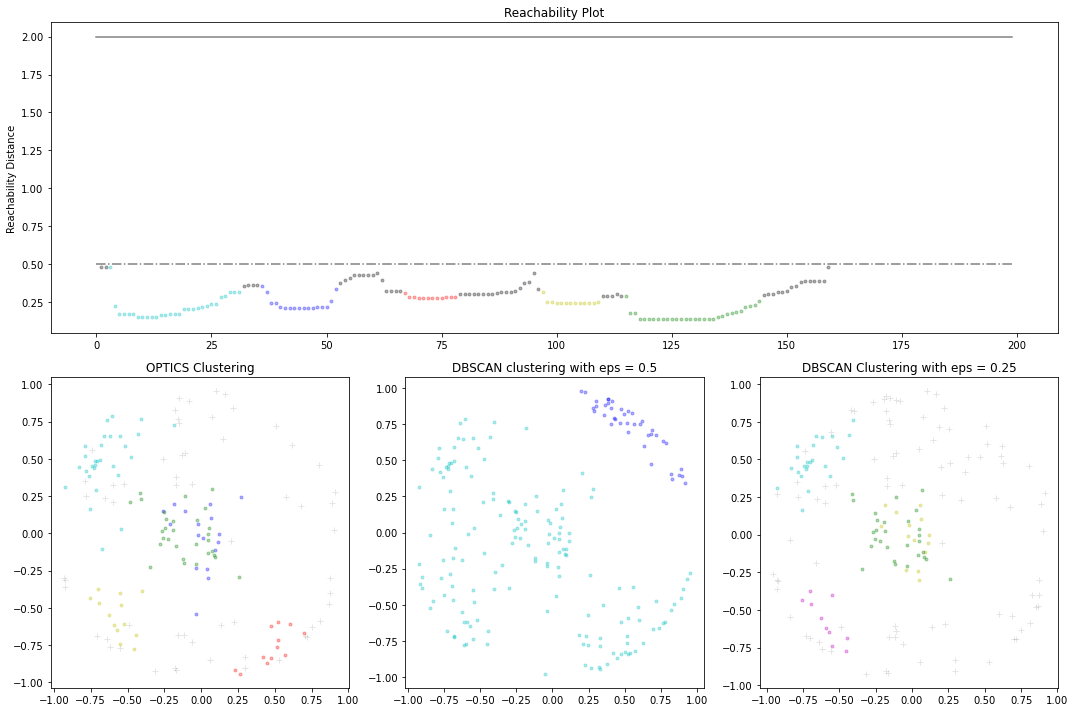

In [9]:
# Defining the framework of the visualization 
plt.figure(figsize =(15, 10)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 

# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 

# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 1], Xk.iloc[:, 2], colour, alpha = 0.3) 

ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0], 
        X_normalized.iloc[optics_model.labels_ == -1, 1], 
    'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 

# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 1], Xk.iloc[:, 2], colour, alpha = 0.3, marker ='.') 

ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
    'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 

# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 1], Xk.iloc[:, 2], colour, alpha = 0.3) 

ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
    'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 0.25') 


plt.tight_layout() 
plt.show() 


Insight:
- Custering OPTICS menghasilkan 5 cluster dengan beberapa outlier. Clustering DBSCAN menggunakan epsilon 0.5 menghasilkan 2 cluster tanpa adanya outlier. Clustering DBSCAN dengan menggunakan epsilon 0.25 menghasilkan 4 cluster dengan beberapa outlier.
- Pada OPTICS, kelompok atau cluster amatan yang memiliki annual income tinggi dan spending score rendah dapat menjadi perhatian pihak Mall karena kelompok orang ini bisa menjadi customer yang berpotensi menghasilkan revenue tinggi di masa depan(profitable)
- Pada OPTICS, kelompok cluster dengan annual income cenderung rendah dan nilai spending score rendah dapat menjadi sasaran pasar untuk meningkatkan revenue dengan memberikan banyak promosi.

# Kesimpulan

1. Algoritma OPTICS dapat mengatasi kelemahan algortima DBSCAN di bagian variying densitynya
2. Kompleksitas OPTICS lebih besar daripada algoritma DBSCAN